<a href="https://colab.research.google.com/github/hsnam95/class2021Fall/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import modules

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### load data 
- #### dataset (x: imdb article -> y: text type)
- #### word2idx dict (key: word; value: index)

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


### modifiy word2idx dict (to reflect x_train, x_text)

In [3]:
word2idx = {k:v+3 for k, v in word2idx.items()} # word2idx의 value값 전부에 3을 더해 준다
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

### create idx2word: inverse of word2idx

In [21]:
idx2word = {v:k for k, v in word2idx.items()}

trainID = 100
print(' '.join([idx2word[idx] for idx in x_train[trainID]]))

<START> i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of <UNK> drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was <UNK> on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep <UNK> the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the <UNK> box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

### padding x_train, x_test

In [11]:
# orignal x: 서로 다른 길이의 단어 index list (25000 개)
# padded x: 25000 x 256 array 인데 256은 한 문장당 fixed된 단어의 갯수

x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

print(x_train.shape)
print(x_test.shape)

(25000, 256)
(25000, 256)


### create model

In [6]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [8]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Epoch 1/10
524/524 [==============================] - 11s 19ms/step - loss: 0.6550 - accuracy: 0.7056 - val_loss: 0.5866 - val_accuracy: 0.7888
Epoch 2/10
524/524 [==============================] - 10s 19ms/step - loss: 0.5056 - accuracy: 0.8256 - val_loss: 0.4439 - val_accuracy: 0.8406
Epoch 3/10
524/524 [==============================] - 10s 18ms/step - loss: 0.3867 - accuracy: 0.8697 - val_loss: 0.3678 - val_accuracy: 0.8641
Epoch 4/10
524/524 [==============================] - 10s 19ms/step - loss: 0.3208 - accuracy: 0.8896 - val_loss: 0.3302 - val_accuracy: 0.8737
Epoch 5/10
524/524 [==============================] - 10s 19ms/step - loss: 0.2806 - accuracy: 0.9009 - val_loss: 0.3071 - val_accuracy: 0.8806
Epoch 6/10
524/524 [==============================] - 9s 18ms/step - loss: 0.2512 - accuracy: 0.9115 - val_loss: 0.2934 - val_accuracy: 0.8846
Epoch 7/10
524/524 [==============================] - 9s 18ms/step - loss: 0.2282 - accuracy: 0.9208 - val_loss: 0.2855 - val_accuracy: 0

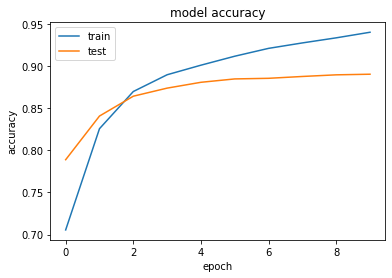

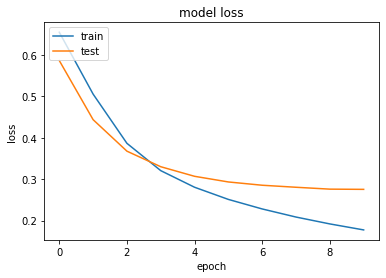

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [20]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2886 - accuracy: 0.8814


[0.288612961769104, 0.8813599944114685]

### inference

In [68]:
testID = 20000
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> the concept of this movie is pretty compelling zombie children climbing out of an abandoned mine to seek revenge for their deaths in the backwoods of <UNK> cool the problem i had with the movie is the lack of creativity when dealing with the zombies the makers could have really <UNK> this film up with some terror like imagery a la the ring such as stop action reverse camera walking or stuff like that when the zombie children are <UNK> through the woods they look like a bunch of 9 year olds walking to a <UNK> in west philadelphia instead of pick <UNK> and <UNK> they could have easily been carrying baseball bats and <UNK> why would i fear these little kids anyone could just run away in a straight line to safety also who in their right mind would have stayed one night with their children in that creepy run down house the moment i opened that front door and looked around i would have said <UNK> hmm <UNK> hmm son go start the car i'm going around back to pee on a bush and then we're

In [67]:
text = 'this is a lovely movie i want to watch it again i was amazed by the grand war scene'
text = text.lower()
words = text.split()
indices = np.zeros(256, dtype = int)

for i in range(len(words)):
  indices[i] = word2idx[words[i]]

model.predict(indices.reshape(1,256))

array([[0.70049286]], dtype=float32)